In [1]:
# https://github.com/chrisluedtke/data-science-journal/blob/master/07-Advanced-Regression/02_Survival_Analysis.ipynb
# data : http://web1.sph.emory.edu/dkleinb/allDatasets/surv2datasets/anderson.dat

In [2]:
# !pip install lifelines

In [3]:
import lifelines
import numpy as np
import matplotlib.pyplot as plt # version > 3.0
import pandas as pd
plt.style.use('seaborn')
from lifelines.datasets import load_leukemia

In [4]:
leukemia = load_leukemia()
leukemia.head()

,t,status,sex,logWBC,Rx
0,35,0,1,1.45,0
1,34,0,1,1.47,0
2,32,0,1,2.20,0
3,32,0,1,2.53,0
4,25,0,1,1.78,0


In [5]:
# leukemia.info()

In [6]:
# leukemia.describe()

In [7]:
durations = leukemia.t.values
events = leukemia.status.values

C:\Users\alber\anaconda3\lib\site-packages\lifelines\plotting.py:723: UserWarning: For less visual clutter, you may want to subsample to less than 25 individuals.
  warnings.warn("For less visual clutter, you may want to subsample to less than 25 individuals.")


(0.0, 40.0)

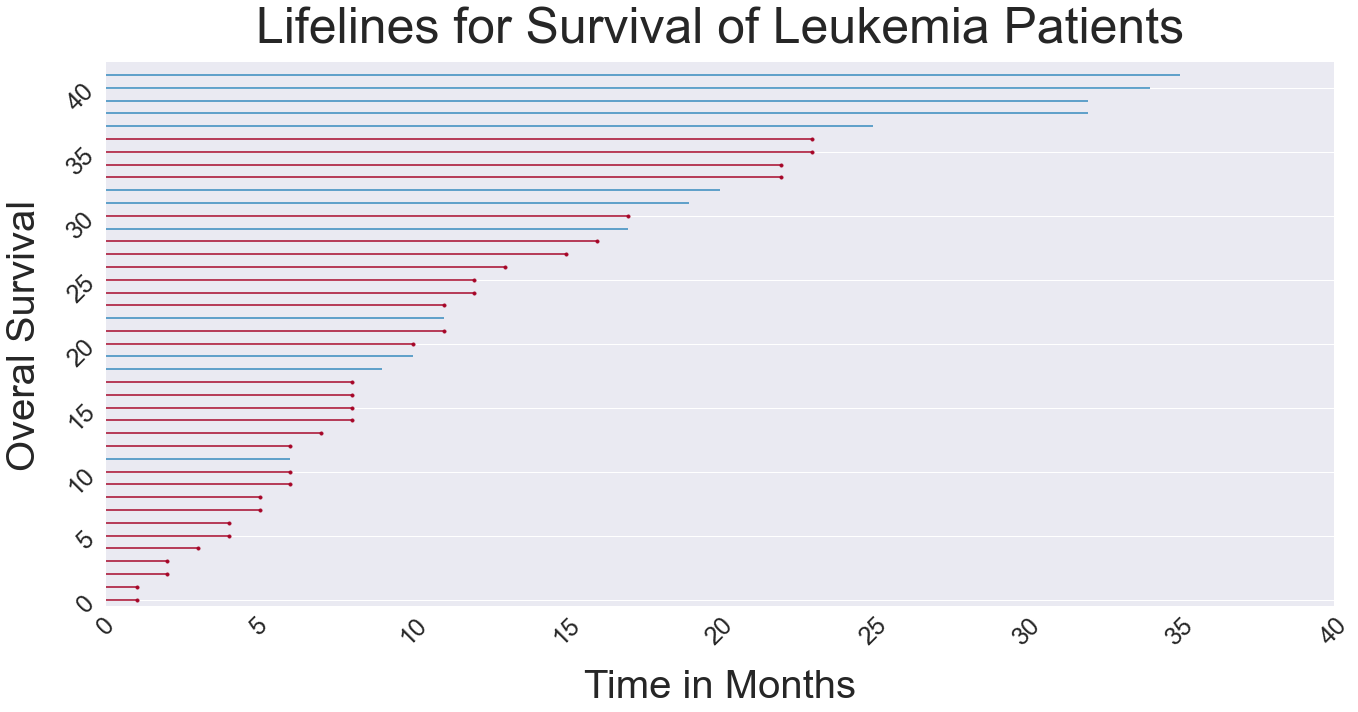

In [8]:

plt.figure(figsize=(22,10))

ax = lifelines.plotting.plot_lifetimes(durations=durations, event_observed=events)
ax.set_title("Lifelines for Survival of Leukemia Patients", fontsize=50, pad=20)
ax.set_xlabel('Time in Months', fontsize=40, labelpad=20); ax.set_ylabel('Overal Survival', fontsize=40, labelpad=20)
ax.tick_params(axis="x", labelsize=25, rotation=45); ax.tick_params(axis="y", labelsize=25, rotation=45)
ax.grid(axis='x')
ax.set_xlim(0, 40)
#plt.tight_layout()

In [9]:
# Kaplan-Meier survival estimate
kmf = lifelines.KaplanMeierFitter()
kmf.fit(durations, events)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 42 total observations, 12 right-censored observations>

The median survival time ater treatment is  12.0 months


<Figure size 1584x864 with 0 Axes>

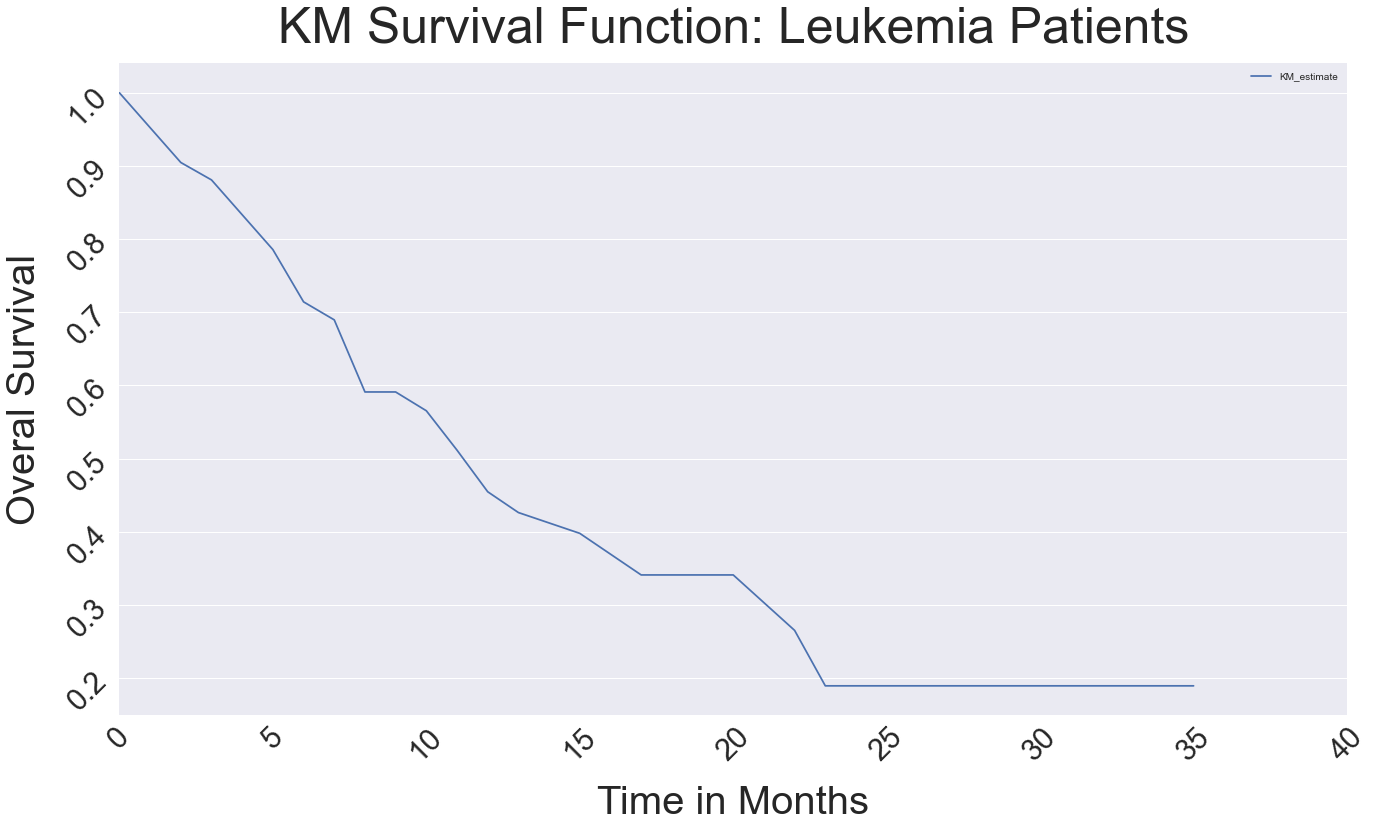

In [10]:
plt.figure(figsize=(22,12))
ax = kmf.survival_function_.plot(figsize=(22,12))
# or kmf.survival_function_.plot.line()
ax.set_title("KM Survival Function: Leukemia Patients", fontsize=50, pad=20)
ax.set_xlabel('Time in Months', fontsize=40, labelpad=20); ax.set_ylabel('Overal Survival', fontsize=40, labelpad=20)
ax.tick_params(axis="x", labelsize=30, rotation=45); ax.tick_params(axis="y", labelsize=30, rotation=45)
ax.grid(axis='x')
ax.set_xlim(0, 40)
print("The median survival time ater treatment is ", kmf.median_survival_time_, "months")

Median survival time with Treatment 1: 8.0 months
Median survival time with Treatment 0: 23.0 months


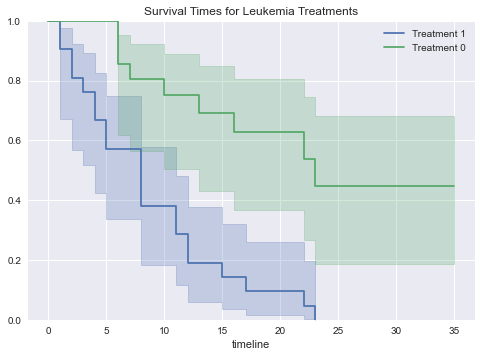

In [11]:
# compare the effects of a single categorical variable, "Rx"
ax = plt.subplot(111)

treatment = (leukemia["Rx"] == 1)
kmf.fit(durations=durations[treatment], 
        event_observed=events[treatment], 
        label="Treatment 1")
kmf.plot(ax=ax)
print(f'Median survival time with Treatment 1: {kmf.median_survival_time_} months')

kmf.fit(durations=durations[~treatment], 
        event_observed=events[~treatment], 
        label="Treatment 0")
kmf.plot(ax=ax)
print(f'Median survival time with Treatment 0: {kmf.median_survival_time_} months')

plt.ylim(0, 1);
plt.title("Survival Times for Leukemia Treatments");

In [12]:
# Cox Proportional Hazards Model -- Survival Regression
# Using Cox Proportional Hazards model
cph = lifelines.CoxPHFitter()
cph.fit(df=leukemia, duration_col='t', event_col='status')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 42 total observations, 12 right-censored observations>
             duration col = 't'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 42
number of events observed = 30
   partial log-likelihood = -69.59
         time fit was run = 2022-04-26 21:26:01 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
sex         0.31       1.37       0.45            -0.58             1.21                 0.56                 3.34
logWBC      1.68       5.38       0.34             1.02             2.34                 2.78                10.40
Rx          1.50       4.50       0.46             0.60             2.41                 1.82                11.11

            cmp to    z      p   -log2(p)
covariate                                
sex           0.00 0.69   0.49       1.03
logWBC        0.00 5.00 <0.005      20.71
Rx            0.00 3.26 <0.005       9.80
---
Concordance = 0.85
Partial AIC = 145.18
log-likelihood ratio test = 47.19 on 3 df
-log2(p) of ll-ratio test = 31.55